<a href="https://colab.research.google.com/github/nicopatronelli/onemax-genetic-algorithms/blob/main/Pr%C3%A1ctica_Algoritmos_Gen%C3%A9ticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello World from Python using Colab!")
!pip install deap

Hello World from Python using Colab!
     |████████████████████████████████| 163kB 7.6MB/s 


In [ ]:
from deap import base 
from deap import creator 
from deap import tools

import random
import matplotlib.pyplot as plt

# problem constants:
ONE_MAX_LENGTH = 100 # length of bit string to be optimized

# genetic algorithm constants:
POPULATION_SIZE = 200 # number of individuals in population
P_CROSSOVER = 0.9 # probability for crossover
P_MUTATION = 0.1 # probability for mutating an individual
MAX_GENERATIONS = 50 # max number of generation for stopping condition

# Descomentar para tener siempre los mismos resultados (para pruebas)
#RANDOM_SEED = 42
#random.seed(RANDOM_SEED)

toolbox = base.Toolbox()
toolbox.register("zeroOrOne", random.randint, 0, 1)


In [ ]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)


In [ ]:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)


In [ ]:
toolbox.zeroOrOne()

1

In [ ]:
ind = toolbox.individualCreator()
print(ind)

[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0]


In [ ]:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)
initPopulation = toolbox.populationCreator(5)
print(initPopulation)

[[1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1], [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1], [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1], [1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
def oneMaxFitness(individual):
  return sum(individual),

# print(oneMaxFitness([1,2,3]))
toolbox.register("evaluate", oneMaxFitness)

In [ ]:
# Definición de operadores genéticos
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("crossover", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)

In [ ]:
l = [0,1,1,1]
toolbox.mutate(l)
print(l)

[0, 1, 1, 1]


In [ ]:
### ESTRUCTURA DEL ALGORITMO GENÉTICO
# 1. Creación de la población inicial
population = toolbox.populationCreator(POPULATION_SIZE)
print(population)
generationCounter = 0

[[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0], [1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0], [0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [ ]:
# 2. Aplicación de la función de fitness (a cada individuo de la población)
fitnessValues = list(map(toolbox.evaluate, population))
print(fitnessValues)

[(39,), (49,), (48,), (49,), (48,), (51,), (50,), (49,), (52,), (46,), (54,), (53,), (53,), (52,), (55,), (61,), (48,), (42,), (52,), (53,), (42,), (50,), (42,), (42,), (53,), (55,), (39,), (43,), (55,), (55,), (51,), (43,), (48,), (57,), (51,), (43,), (50,), (53,), (42,), (46,), (62,), (49,), (47,), (47,), (49,), (53,), (54,), (56,), (46,), (54,), (48,), (43,), (52,), (49,), (51,), (53,), (58,), (50,), (44,), (46,), (53,), (47,), (43,), (51,), (47,), (46,), (49,), (50,), (46,), (49,), (48,), (53,), (43,), (48,), (52,), (54,), (53,), (53,), (45,), (45,), (51,), (52,), (53,), (50,), (51,), (53,), (44,), (50,), (46,), (59,), (45,), (42,), (46,), (50,), (46,), (44,), (54,), (59,), (44,), (54,), (51,), (52,), (36,), (48,), (49,), (58,), (50,), (48,), (53,), (47,), (55,), (52,), (55,), (43,), (42,), (50,), (48,), (50,), (49,), (43,), (43,), (50,), (55,), (56,), (61,), (54,), (49,), (59,), (47,), (55,), (36,), (44,), (55,), (59,), (52,), (49,), (42,), (49,), (51,), (50,), (42,), (49,), (58,)

In [ ]:
# 3. Asociamos los individuos con su respectivo valor de fitness y armamos una lista de tuplas (individuo, valorFitness)
# Recordar que un objeto Individual tiene un atributo de instancia llamado fitness del tipo creator.FitnessMax
for individual, fitnessValue in zip(population, fitnessValues):
  individual.fitness.values = fitnessValue

In [ ]:
# 4. Obtenemos el primer valor de cada tupla de fitness (el único que usamos) para fines estadísticos
fitnessValues = [individual.fitness.values[0] for individual in population]

In [ ]:
# 5. Las estadísticas que vamos a considerar son el mayor valor de fitness y el promedio del valor de fitness de todos los individuos.
# Ambas métricas se calcularán por cada generación, así que finalmente tendremos una lista de valores por cada una.
maxFitnessValues = []
meanFitnessValues = [] 

len original population: 200
len offspring: 200
- Generation 1: MAX Fitness = 64.0, AVG Fitness = 53.5
Best Individual =  1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 

len original population: 200
len offspring: 200
- Generation 2: MAX Fitness = 70.0, AVG Fitness = 57.125
Best Individual =  0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 

len original population: 200
len offspring: 200
- Generation 3: MAX Fitness = 69.0, AVG Fitness = 60.06
Best Individual =  1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 

len original population: 

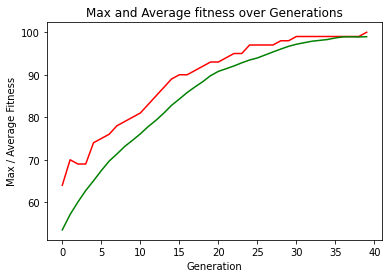

In [ ]:
# 6. Comenzamos a definir el bucle principal del algoritmo genético. 
# Lo primero que definimos son las condiciones de paro. En este caso tenemos dos: cuando se alcanza el número máximo de generaciones (MAX_GENERATIONS) o cuando
# se obtiene un individuo que maximiza la función de fitness (oneMaxFitness), es decir, cuyos digítos binarios son todos 1s, en cuyo caso oneMaxFitness tendrá
# un valor igual a la longitud del individuo (ONE_MAX_LENGTH)
while max(fitnessValues) < ONE_MAX_LENGTH and generationCounter < MAX_GENERATIONS:
  # 7. Incrementamos en uno el contador de generaciones
  generationCounter = generationCounter + 1
  # 8. SELECCION: Aplicamos el operador de selección a la población actual // offspring = descendencia, hijos
  offspring = toolbox.select(population, len(population))
  # 9. Clonamos la población filtrada (almacenada en la variable offspring) para poder aplicar los siguientes operadores genéticos sin alterar la población original
  offspring = list(map(toolbox.clone, offspring))
  print('len original population: {}'.format(len(population)))
  print('len offspring: {}'.format(len(offspring)))
  
  # Nota: Si bien llamamos a esta lista offspring, en realidad todavía son clones de la generación actual. Para tener realmente descedencia debemos aplicar el operador de cruza
  # 10. CRUZA: Aplicamos el operador de cruza (si se cumple la probabilidad)
  for childA, childB in zip (offspring[::2], offspring[1::2]): 
    if random.random() < P_CROSSOVER: # Se decide si se hace la cruza o no. Ejemplo: random.random() => 0.5 < P_CROSSOVER = 0.9 => Se hace la cruza. random.random() retorna un valor decimal entre 0 y 1
      toolbox.crossover(childA, childB) # La función crossover modifica los individuos "in place", tiene efecto de lado
      del childA.fitness.values # Debemos eliminar los valores de fitness de los hijos modificados ya que los mismos han sido alterados y no siguen siendo válidos
      del childB.fitness.values
  # 11. MUTACIÓN: Aplicamos el operador de mutación (si se cumple la probabilidad)
  for candidateToMutate in offspring:
    if random.random() < P_MUTATION:
      toolbox.mutate(candidateToMutate) # La función mutate tiene efecto de lado, muta el individuo "in place". Por ejemplo, el individuo [1,0,1,0,0] podría resultar en el individuo [1,1,1,0,0]
      # Nuevamente, debemos eliminar los valores de fitness del individuo que modificamos (en este caso mutamos) porque no sigue siendo válido: según el ejemplo anterior paso de valer 2 a valer 3, por lo que debe ser recalculada
      del candidateToMutate.fitness.values 
  # 12. Los individuos que no se seleccionan para la cruza o la mutación permanecen inalterados, por lo que su valor de fitness se mantiene intacto y no necesita ser 
  # recalculado (hacerlo sería un desperdicio de procesamiento). Los individuos que hayan sido alterados tendrán su valor de fitness eliminado (porque así lo hicimos con del) y el mismo deberá 
  # ser calculado. Para decidir, entonces, sobre que individuos de la población resultante es necesario recalcular la función de fitness vamos a utilizar la propiedad fitness
  # del objeto Individual: si está vacía la calculamos, sino la dejamos como está
  freshIndividuals = [ind for ind in offspring if not ind.fitness.valid]
  freshFitnessValues = list (map(toolbox.evaluate, freshIndividuals))
  for individual, fitnessValue in zip(freshIndividuals, freshFitnessValues):
    individual.fitness.values = fitnessValue
  # 13. Reemplazamos la generación (población) actual con la nueva
  population[:] = offspring
  # 14. Recolectamos los valores de fitness actuales para las estadísticas. Dado que el valor de fitness de cada individuo es sólo el primer elemento de la tupla, lo seleccionamos usando [0]
  fitnessValues = [ind.fitness.values[0] for ind in population]
  # 15. Calculamos el valor de fitness máximo y el promedio de la presente generación
  maxFitness = max(fitnessValues)
  meanFitness = sum(fitnessValues) / len(population)
  maxFitnessValues.append(maxFitness)
  meanFitnessValues.append(meanFitness)
  print("- Generation {}: MAX Fitness = {}, AVG Fitness = {}".format(generationCounter, maxFitness, meanFitness))
  # 16. También logueamos el mejor individuo de la presente generación (el que tiene mayor valor de fitness, es decir, mayor cantidad de 1s)
  bestIndex = fitnessValues.index(max(fitnessValues))
  print("Best Individual = ", *population[bestIndex], "\n")
# 17. Una vez que se cumple alguna condición de paro y el algoritmo genético concluye graficamos las estadísticas
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average fitness over Generations')
plt.show()